# SGDRegressor

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.model_selection as model_selection
from sklearn.linear_model import SGDRegressor

In [3]:
# flights table
data = pd.read_csv('/Users/Matthew Wong/flights_table_optimized(50,000 points).csv',delimiter=';')
data = data.iloc[: , 1:]

In [4]:
#Assign train and target variables
X = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','Route','distance','air_time','depart_hour','dep_delay_route','arr_delay_route','taxi_out_route','taxi_in_route','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city','dep_delay_month','arr_delay_month','taxi_out_month','taxi_in_month']]
y = data['arr_delay']

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

In [5]:
display(data.head(3))
display(data.shape)

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,...,taxi_in_route,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,dep_delay_month,arr_delay_month,taxi_out_month,taxi_in_month,arr_delay
0,12,30,2019,220,17,105,8,2987,674.0,84.0,...,8.444444,1.710611,-4.176849,11.800643,8.057878,0.892546,-5.488575,17.429543,7.718988,-3.0
1,4,8,2018,296,49,233,4,4370,672.0,98.0,...,6.208333,1.014692,-4.634527,19.509642,6.965106,-0.045202,-5.727201,16.802538,7.431139,25.0
2,11,21,2018,52,40,17,9,604,259.0,46.0,...,10.238095,-1.163522,-7.421384,14.861635,8.779874,0.093850,-5.732620,16.940107,7.404545,-13.0


(44551, 24)

In [7]:
model = SGDRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

R2 Score for train data: -1.9586866786517442e+28
R2 Score2 for test data: -1.9600704390911474e+28
MAE Score for test data:  1922593761236222.8


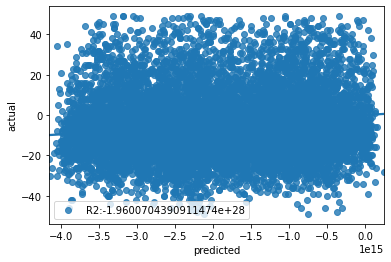

In [8]:
#prints the R2 score for your test dataset
print('R2 Score for train data:', round(model.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# SGDRegressor Grid Search

In [9]:
#define hyperparameters we want to tune
param_grid = {
    'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet']
}

#instantiate GridSearchCV, fit model, and make prediction
model = GridSearchCV(SGDRegressor(), param_grid = param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame(model.cv_results_)

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number 

In [10]:
display(model.best_params_)
display(model.best_score_)

df.sort_values('rank_test_score', ascending = True).head(3)

{'loss': 'huber', 'penalty': 'elasticnet'}

-41.021348857153356

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.690976,0.124820,0.003123,0.001138,huber,elasticnet,"{'loss': 'huber', 'penalty': 'elasticnet'}",-0.323625,-157.798516,-2.164658,-25.642402,-19.177542,-41.021349,59.189049,1
4,0.832503,0.330563,0.003514,0.001703,huber,l1,"{'loss': 'huber', 'penalty': 'l1'}",-48.620509,-184.288403,-178.686675,-1.035274,-1.318199,-82.789812,82.446518,2
3,3.027198,0.523261,0.003508,0.000785,huber,l2,"{'loss': 'huber', 'penalty': 'l2'}",-205.481891,-129.565501,-68.693768,-2.915965,-325.486652,-146.428756,111.778372,3
